<a href="https://colab.research.google.com/github/thalitadru/ml-class-epf/blob/main/LabAssignmentTreesEnsembles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercices
You have 6 exercises in this lab assignment, 3 of which are optional. 

**Note**: Use `random_seed=42` so we all get the same results.

*Credits:* Based on [code written by A. Géron](https://github.com/ageron/handson-ml2) for his book ""Hands-on ML with scikit-learn, keras and tensorflow.", 2nd edition 2019, O'Reilly Media. Code realeased under [Apache-2.0 License](https://github.com/ageron/handson-ml2/blob/master/LICENSE).

In [ ]:
import matplotlib.pyplot as plt
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
from scipy import stats


## Exercise 1: Imbalanced classification with tree ensembles

### Data
[Predict students' dropout and academic success](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)

In [ ]:
# fetch dataset 
from ucimlrepo import fetch_ucirepo 
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697) 
  
# data (as pandas dataframes) 
X = predict_students_dropout_and_academic_success.data.features 
y = predict_students_dropout_and_academic_success.data.targets 
  
# metadata 
display(predict_students_dropout_and_academic_success.metadata) 
  
# variable information 
display(predict_students_dropout_and_academic_success.variables) 

{'uci_id': 697,
 'name': "Predict students' dropout and academic success",
 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success',
 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv',
 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.",
 'area': 'Othe

,name,role,type,demographic,description,units,missing_values
0,Marital Status,Feature,Integer,Marital Status,1 – single 2 – married 3 – widower 4 – divorce...,None,no
1,Application mode,Feature,Integer,None,1 - 1st phase - general contingent 2 - Ordinan...,None,no
2,Application order,Feature,Integer,None,Application order (between 0 - first choice; a...,None,no
3,Course,Feature,Integer,None,33 - Biofuel Production Technologies 171 - Ani...,None,no
4,Daytime/evening attendance,Feature,Integer,None,1 – daytime 0 - evening,None,no
5,Previous qualification,Feature,Integer,Education Level,1 - Secondary education 2 - Higher education -...,None,no
6,Previous qualification (grade),Feature,Continuous,None,Grade of previous qualification (between 0 and...,None,no
7,Nacionality,Feature,Integer,Nationality,1 - Portuguese; 2 - German; 6 - Spanish; 11 - ...,None,no
8,Mother's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no
9,Father's qualification,Feature,Integer,Education Level,1 - Secondary Education - 12th Year of Schooli...,None,no


In [ ]:
predict_students_dropout_and_academic_success.variables.iloc[-1].loc[ 'description']

'Target. The problem is formulated as a three category classification task (dropout, enrolled, and graduate) at the end of the normal duration of the course'

(array([1421.,    0.,    0.,    0.,    0., 2209.,    0.,    0.,    0.,
         794.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

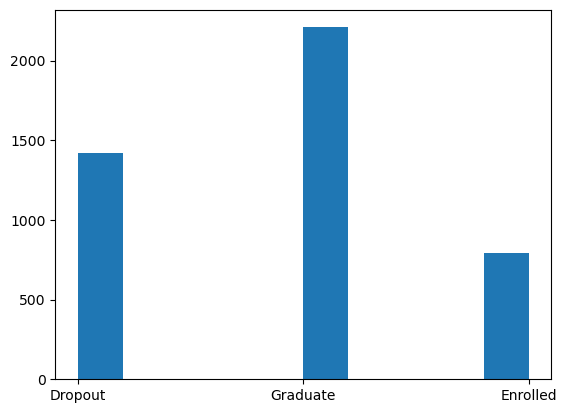

In [ ]:
plt.hist(y)

### Questions
1. For this dataset, try two types of tree ensembles:
    - [`GradientBoostingClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)
    - [`RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)
1. Compare model scores on the training set vs the validation set. Are the models overfitting or underfitting?

1. Choose a pertinent hyperparameter that you will adjust in order to reduce the problem you just diagnosed. Try a few values to see if you find a better model.

1. Once you have found the best model, provide a detailed evaluation on the test set using the [`classification_report`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html). Make sure you understand what each of the results mean. 

1. Imagine the main goal of this study is to be able to retrieve students in difficulty and help them _before_ they dropout. Altough it is not desirable to overload student counseling professionals (suppose they can provide guidance to 30% of the students), it is ok to send to counseling a student who would graduate just fine without it. Not noticing a student in difficulty is a greater problem that may lead to delayed graduation (the "enroled" class) or dropouts. 
    - Which metric would be the most appropriate to evaluate this goal? 
    - Which model scored best on this metric?

1. It is possible to choose the probability threshold in order to trade-off precision for recall (or vice versa)
    - focus on the "Dropout" class (i.e., use it as your positive class, the others will be negative)
    - compute values of precision and recall for multiple tresholds using the function [`precision_recall_curve`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_curve.html) 
    - find out the threhold and the precision you get for 85% recall. Does it seem like a reasonable trade-off given the context of the application?

## Exercise 2 (Optional): Feature importance on tree ensembles

### Exercise
Now that you have chosen the best model, let's retrieve which attributes are the main predictors of a student dropping out. This means we want to estimate *feature importance*. With tree ensembles, there are two main ways of doing so.

1. Compute feature importances using the [permutation importance](https://scikit-learn.org/stable/modules/permutation_importance.html). Get the top-10 most important features.

2. Compute feature importances following ["mean decrease in impurity (MDI)"](https://scikit-learn.org/stable/modules/ensemble.html#feature-importance-evaluation). These get precomputed during `fit`, and are based on the training set only. Get the feature importances computed from the random forest model trained before, and check the top-10 most important features. Are they the same as with the permutation method? Is their rank the same?

3. `sklearn`'s documentation warns about two main caveats of using MDI to estimate feature importance. Did you notice them in the docs? Which are they?

## Exercise 3: Voting Classifier on MNIST
### Data
This exercise uses the MNIST dataset: a set of 28x28 images containing hadnwritten 0-9 digits. It can be loaded using `sklearn` functions as follows:

In [ ]:
from sklearn.datasets import fetch_openml

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

Here the feaures in X are simply all the 784 pixels of any given image, in vectorized form. To visualize the orignal image, the vector must be reshaped back to a 2D array as follows:

In [ ]:
plt.imshow(X[0, :].reshape([28, 28]), cmap='Greys')

**The goal** is to correctly predict the digit from the image pixels. This is what you have in the y array:

In [ ]:
y[0:10]

### Feture range and scaling
In general, that pixel values here range in 0-255. However, since digits are always cented, pixels in the center of the image tend to have a larger variance than those at the border. To visualize this, observe the plotting of the stddev for each pixel across all images. See how pixels at the border have near 0 variance while  those at the center have a much large one.

In [ ]:
plt.imshow(X.std(axis=0).reshape([28,28]))
plt.colorbar()
plt.title("Standard deviation per image location\n (i.e. per feature)")
plt.show()

Remember models trained with continuous optimization (especially 1st order methods) benefit from features having a similar range (because this leads to better conditioned cost functions). For these methods **it is recommended that you apply some form of feature scaling**. For example, after applying standard scaling, variances become mostly equal to 1, meaning all features lie in a similar range:

In [ ]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)

plt.imshow(X_scaled.std(axis=0).reshape([28,28]))
plt.colorbar()
plt.title("Standard deviation per image location\n (i.e. per feature)")
plt.show()

Note that some pixels still have 0 standard deviation. This happens because they are always zero across all images. We will further process the data to remove these pixel features from our data.

In [ ]:
X_scaled = X_scaled[: , X_scaled.std(axis=0) != 0]

### Questions


1. Split the MNIST data split it into a training set, a validation set, and a test set (e.g., use 50,000 instances for training, 10,000 for validation, and 10,000 for testing). 

1. Fit a voting ensemble combining multple models. Include:  
    - a [`RandomForestClassifier`](),
    - an [`ExtraTreesClassifier`](),
    - and a [`LinearSVC`](). 


1. Evaluate the accuracy of the ensemble model and compare it to that if its member models. Does the ensemble outperform all of the included models?

1. Remove the weakest model of the ensemble, then re-evaluate the ensemble's accuracy. Did it get better?

1. Try using soft voting this time and compare the accuracy to hard voting. Does soft voting outperform all individual models?



## Exercise 4: Stacking Ensemble on MNIST
1. Using the same estimators as the previous voting classifier, now train a stacking ensemble. Use a logsitic regression as your blender model.

1. How does it compare to the voting classifier you trained earlier?

1. You have tried 3 different voting ensembles and a stacking ensemble. Which one would you choose for deployment? Estimate the expected generalization performance by evaluating the best ensemble on the test set.

## Exercise 5 (Optional): Train and fine-tune a decision tree
Train and fine-tune a Decision Tree for the moons dataset by following these steps:  
  1. Use `make_moons(n_samples=10000, noise=0.4)` to generate a moons dataset.   
  1. Use `train_test_split()` to split the dataset into a training set and a test set.
  1. Use grid search with cross-validation (with the help of the `GridSearchCV` class) to find good hyperparameter values for a `DecisionTreeClassifier`. Hint: try various values for `max_leaf_nodes`.
  1. Train it on the full training set using these hyperparameters, and measure your model's performance on the test set. You should get roughly 85% to 87% accuracy.

## Exercise 6 (Optional): Grow your own random forest
Grow a forest by following these steps:  
  
  1. Continuing the previous exercise, generate 1,000 subsets of the training set, each containing 100 instances selected randomly. *Hint*: you can use ScikitLearn’s `ShuffleSplit` class for this.  
  1. Train one Decision Tree on each subset, using the best hyperparameter values found in the previous exercise. Evaluate these 1,000 Decision Trees on the test set. Since they were trained on smaller sets, these Decision Trees will likely perform worse than the first Decision Tree, achieving only about 80% accuracy.  
  1. Now comes the magic. For each test set instance, generate the predictions of the 1,000 Decision Trees, and keep only the most frequent prediction (you can use SciPy’s `mode()` function for this). This approach gives you majority-vote predictions over the test set.  
  1. Evaluate these predictions on the test set: you should obtain a slightly higher accuracy than your first model (about 0.5 to 1.5% higher). Congratulations, you have trained a Random Forest classifier!